# Linear Regression

In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# importing the dataset
data = pd.read_csv(r"C:\Users\himan\Desktop\ML\EDA\DataSets\height_weight_data.csv")

In [5]:
data.head() # printing the data

,Height,Weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [6]:
data.columns

Index([' Height', ' Weight'], dtype='object')

Text(0, 0.5, 'Heights')

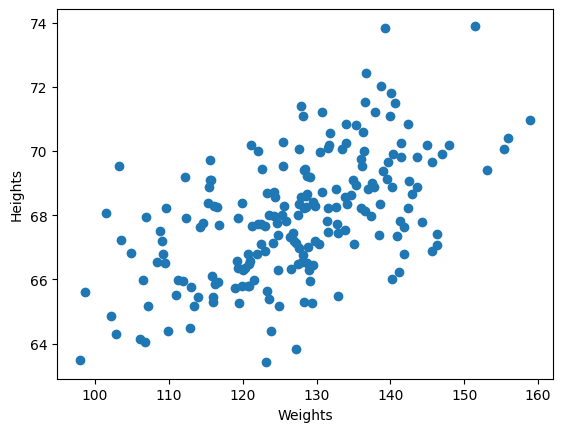

In [7]:
# checking the correlation between datapoints 
# Using Scatter Plot
plt.scatter(data[' Weight'], data[' Height'])
plt.xlabel("Weights")
plt.ylabel("Heights")

In [8]:
# Checking Correlation
data.corr()

,Height,Weight
Height,1.000000,0.556865
Weight,0.556865,1.000000


From the correlation, we can say that the height and weight are not highly correlated.

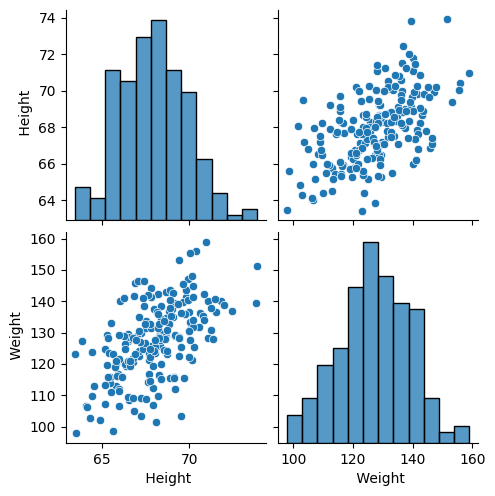

In [9]:
# using seaborn 
sns.pairplot(data)

From the above results, we can say that with increaase in height/weight, the weight/height is also increasing. Therefore linear regression can be applied to find the best fit line.

Now comes the major steps -

In [34]:
# Finding the Independent and Dependent Feature.
X = data[[' Weight']] # Independent Feature and it should be DataFrame.
Y = data[' Height'] # As it is a dependent Feature, it is fine as a Series. 1D array

In [35]:
X_series = data[' Weight']
X_series.shape

(200,)

First of all understand the major difference between using Single Bracket and Double Bracket.  
Single Bracket gives us Pandas Series which is 1D.  
Double Bracket gives us Pandas DataFrame which is 2D and can be manipulated. 

So for finding the best fit line, we require 2 axis (x and y) for which 2D array is important.

In [37]:
# Now its time for TRAIN TEST SPLIT 
import sklearn
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 45)

Now here the important thing to understand is that our heights data points are in 'cm' and our weights data points are in 'Pounds'. So we need to make the independent feature,  
which is 'weights', small or i say we have to standarize the Independent Feature.  
The reason for doing this is to Easy the Optimization process. The smaller the value, the less time it will take to reach the Global Minima.  
<br>
> Gradient Descent works on independent feature.

In [42]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [45]:
# Now standardizing the input feature
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

We use fit_transform in Train because here we use the formula for z score to calculate the mean and std. deviation which is used in Test during Test. We don't want  
to use mean and std. deviation of test data else what will be the purpose of training the model.  
The main is for doing this is to prevent Data Leakage. I dont't want the train data to know anything about the test data. Coz ultimately Train data is the real values which  
is in use to give the future predictions.

In [46]:
x_test = scaler.transform(x_test)

In [47]:
x_test

array([[ 0.15760423],
       [ 1.13789344],
       [-0.21295183],
       [-0.63319609],
       [ 0.23845282],
       [-0.37296467],
       [ 1.11683912],
       [ 0.6519597 ],
       [ 1.30127498],
       [-1.72128343],
       [ 0.10538951],
       [ 0.91555981],
       [-0.6205635 ],
       [ 0.78586518],
       [ 0.24182152],
       [-1.49221241],
       [ 0.40015001],
       [ 0.59721846],
       [-0.18179143],
       [ 1.52445078],
       [-0.26095568],
       [-0.18852882],
       [ 0.15676206],
       [-1.52421498],
       [-0.50265929],
       [ 0.04727958],
       [-1.03828123],
       [-0.67362039],
       [ 1.30801236],
       [-0.22558442],
       [-1.1789241 ],
       [-1.17050237],
       [ 0.02538309],
       [ 1.57498116],
       [ 0.97535408],
       [ 2.39946839],
       [ 0.71006963],
       [-1.31535611],
       [ 1.46634086],
       [-1.56295493],
       [-0.31906561],
       [ 1.04525443],
       [ 2.06344142],
       [ 0.4936312 ],
       [-1.85771543],
       [ 0

In [48]:
# Now Applying the Simple Linear Regression 
from sklearn.linear_model import LinearRegression

In [53]:
regression = LinearRegression()

In [55]:
regression.fit(x_train, y_train) # It is trying to find the best fit line.

LinearRegression()

In [ ]:
# Finding the coeff and intercept of the line 
## Coefficient - beta1(x1)
print(regression.coef_)

## Intercept - beta0
print(regression.intercept_)

[0.96362781]
67.96173333333333


Now the question is what does coefficient and intercept means.  
Coeff/Slope = 1 unit movement in x1 leads to beta1 movement in height or slope.  
Intercept = At what point line is meeting on y-axis. 

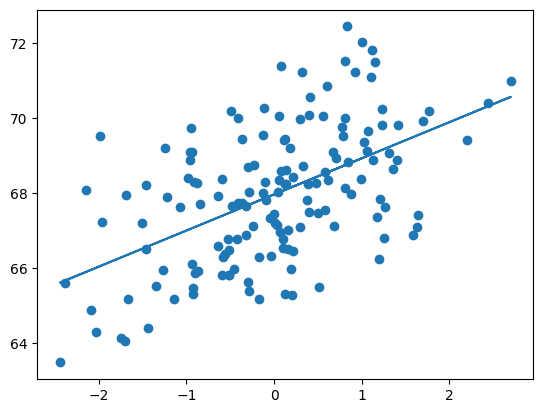

In [63]:
# Plotting the Best Fit line of Train Data.
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

# Prediction for Test Data
predicted_height_output = intercept + coeff * (weights)  
y_pred = 67.961 + 0.963 * (x_test)  

regression.predict(x_test) is in background applying the same formula -> beta0 + beta1 * (x1)

In [65]:
# Prediction for Test Data
y_pred = regression.predict(x_test)

In the above code, we are trying to predict the y values and then this y_pred is used to compare with the actual values of y (y_train).  
This is done to evaluate our model using MSE or R^2.

In [66]:
# Performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse, mae, rmse, sep = "\n")

3.1625376663109814
1.3190490144009004
1.7783525146356618


In [72]:
# Now its time to check whether our model is performing good or not ?
from sklearn.metrics import r2_score

In [74]:
score = r2_score(y_test, y_pred)
print(score)

0.36338451433188423


In [80]:
# Using OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit() 

In [81]:
prediction = model.predict(x_test)
prediction

array([ 0.15187182,  1.09650577, -0.20520631, -0.61016536,  0.22977977,
       -0.35939913,  1.07621724,  0.6282465 ,  1.25394476, -1.65867658,
        0.10155626,  0.88225889, -0.59799224,  0.75728155,  0.23302594,
       -1.43793738,  0.38559568,  0.57549632, -0.17517928,  1.46900317,
       -0.25146415, -0.18167161,  0.15106028, -1.46877594, -0.48437648,
        0.04555992, -1.00051667, -0.64911934,  1.26043709, -0.21737942,
       -1.13604405, -1.12792864,  0.02445985,  1.51769565,  0.93987832,
        2.31219447,  0.68424284, -1.26751373,  1.41300683, -1.50610684,
       -0.3074605 ,  1.00723624,  1.98838954,  0.47567675, -1.79014625,
        0.46999597,  0.73618148, -1.05488993,  0.86521653,  0.16647956])

In [88]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.007
Method:                 Least Squares   F-statistic:                            0.02994
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                       0.863
Time:                        09:31:38   Log-Likelihood:                         -845.72
No. Observations:                 150   AIC:                                      1693.
Df Residuals:                     149   BIC:                                      1696.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
# Prediction for new data
regression.predict([[70]])
# If in case the value is very large then first standardize the weight and then prdict on it.

array([135.41568016])